In [1]:
# import the requirements Libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

# import the requirements
# to visualize all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv("C:\\Users\\Saransh Sehrawat\\My Projects\\Internship Credit Risk\\Training_Dataset\\Training_Batch_process.csv")

data.drop(columns=["Unnamed: 0"],inplace=True)

data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,2.890372,4,2,6.955593,1,2,4,2,1,4,2,3.044522,3,1,1,3,2,1,2,1
1,1,2.197225,4,0,7.937017,1,3,2,3,1,2,1,3.583519,3,1,2,3,1,1,2,1
2,2,2.484907,2,9,6.734592,2,4,2,2,1,4,1,3.135494,3,1,1,2,2,1,2,1
3,1,2.484907,4,0,7.660114,1,3,3,3,1,2,1,3.663562,3,1,2,2,1,1,1,1
4,1,2.302585,4,0,7.714677,1,2,1,3,1,3,1,3.871201,3,1,2,2,1,1,1,1


In [3]:
# Feature Selection Method:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif #ANOVA(F-TEST)


# Separate the target column the from the dataset
X = data.drop(columns=['credit_risk'])
y=data["credit_risk"] 

print("Feature data dimension: ", X.shape)

#lr_list = range(0,11)
#or k in lr_list:

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=f_classif,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

#create a dataframe
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
lst=features_rank.sort_values(by=["Score"],ascending=False)

print("Feature listed by socore:","\n",lst,"\n")
print("Top 10 Features are :","\n",features_rank.nlargest(10,'Score'))
#By using SelectKbest method findding the top 10 features

Feature data dimension:  (800, 20)
Feature listed by socore: 
                    Features       Score
0                    status  103.520610
2            credit_history   44.490068
1                  duration   29.123758
5                   savings   21.314446
11                 property   12.951793
6       employment_duration   10.371529
13  other_installment_plans    9.587006
12                      age    8.317643
4                    amount    5.176872
7          installment_rate    5.167261
19           foreign_worker    4.974140
8       personal_status_sex    1.515033
18                telephone    1.265790
15           number_credits    1.240575
16                      job    0.694743
3                   purpose    0.448758
9             other_debtors    0.091301
17            people_liable    0.050776
10        present_residence    0.021995
14                  housing    0.001496 

Top 10 Features are : 
                    Features       Score
0                    status  10

In [4]:
new_data=data[['status',
 'credit_history',
 'duration',
 'savings',
 'property',
 'employment_duration',
 'other_installment_plans',
 'age',
 'amount',
 'installment_rate',"credit_risk"]]
new_data.head()


#By using feature selction method select the top 10 features which have highest score.

,status,credit_history,duration,savings,property,employment_duration,other_installment_plans,age,amount,installment_rate,credit_risk
0,1,4,2.890372,1,2,2,3,3.044522,6.955593,4,1
1,1,4,2.197225,1,1,3,3,3.583519,7.937017,2,1
2,2,2,2.484907,2,1,4,3,3.135494,6.734592,2,1
3,1,4,2.484907,1,1,3,3,3.663562,7.660114,3,1
4,1,4,2.302585,1,1,2,3,3.871201,7.714677,1,1


In [5]:
# MOdel Creation

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import plot_confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

In [6]:
# Separate the target column the from the dataset
X = new_data.drop(columns=['credit_risk'])
y=new_data["credit_risk"] 


print(y.value_counts()) # imbalance dataset

1    600
0    200
Name: credit_risk, dtype: int64


Count of each class: 
 1    600
0    200
Name: credit_risk, dtype: int64


Percentage of each class :  
 1    75.0
0    25.0
Name: credit_risk, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


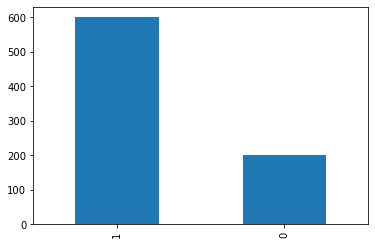

In [7]:
# for imabalne data set
print("Count of each class:","\n",y.value_counts()) # imbalnce dataset
# Percentage calculation
print("\n")
print("Percentage of each class : ","\n",(y.value_counts()/y.count())*100)
print(y.value_counts().plot(kind = 'bar'))


**Note:Dataset needs to balance , for better calssification.**

In [8]:

scaler =StandardScaler()

scaled = scaler.fit_transform(X)


'''"For Logistic regression algorithm (Based on algorithm)scaling the data set,
to give equal importance to all features"'''

X_scaled=pd.DataFrame(scaled)
X_scaled.head()


,0,1,2,3,4,5,6,7,8,9
0,-1.318842,1.289599,0.061181,-0.720054,-0.334844,-1.140353,0.460325,-1.629650,-1.056017,0.923977
1,-1.318842,1.289599,-1.121800,-0.720054,-1.281400,-0.322896,0.460325,0.196050,0.214657,-0.840180
2,-0.518938,-0.529941,-0.630819,-0.090499,-1.281400,0.494562,0.460325,-1.321509,-1.342152,-0.840180
3,-1.318842,1.289599,-0.630819,-0.720054,-1.281400,-0.322896,0.460325,0.467172,-0.143856,0.041899
4,-1.318842,1.289599,-0.941983,-0.720054,-1.281400,-1.140353,0.460325,1.170493,-0.073211,-1.722258


# OverSampling Method: To Balance the Dataset

The number of classes before fit Counter({1: 600, 0: 200})
The number of classes after fit Counter({1: 600, 0: 450})


Count of each class after oversampling: 
 1    600
0    450
Name: credit_risk, dtype: int64


Percentage of each class after oversampling :  
 1    57.142857
0    42.857143
Name: credit_risk, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


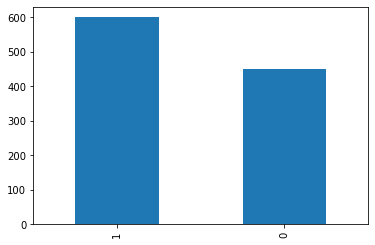

In [9]:
### Handle the imbalance dataset by using oversampling methods
###!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

os=RandomOverSampler(0.75)

X_ov,y_ov=os.fit_resample(X_scaled,y)

print("The number of classes before fit {}".format(Counter(y))) # Before oversampling
print("The number of classes after fit {}".format(Counter(y_ov)))# After Oversamplig
print("\n")

print("Count of each class after oversampling:","\n",y_ov.value_counts()) # balance dataset
print("\n")
print("Percentage of each class after oversampling : ","\n",(y_ov.value_counts()/y_ov.count())*100)
print(y_ov.value_counts().plot(kind = 'bar'))

# Split the Dataset

In [10]:
print("Split the data into training and test set")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ov,y_ov, test_size=0.25, random_state=355)

# For model training and evaluation

print('X_train columns : {a} and Rows : {b}'.format(a=X_train.shape[1],b=X_train.shape[0]))
print('X_test columns : {a} and Rows : {b}'.format(a=X_test.shape[1],b=X_test.shape[0]))

Split the data into training and test set
X_train columns : 10 and Rows : 787
X_test columns : 10 and Rows : 263


## Model Selection:

In [11]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import  KFold,cross_val_score


models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('Ada', AdaBoostClassifier()))
models.append(('Grad', GradientBoostingClassifier()))
models.append(('Xgb', XGBClassifier()))
SEED = 121

# Model Evaluation

result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10, random_state=121,shuffle=True)
    cv_results1 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (model_name, cv_results1.mean(),cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)


LR:
 ACCURACY = 0.743330, RECALL=(0.776028), PRECISION=(0.769833), ROC-AUC=(0.792100)
KNN:
 ACCURACY = 0.715320, RECALL=(0.753628), PRECISION=(0.743840), ROC-AUC=(0.783550)
SGD:
 ACCURACY = 0.639046, RECALL=(0.765004), PRECISION=(0.718933), ROC-AUC=(0.719027)
DT:
 ACCURACY = 0.796706, RECALL=(0.761458), PRECISION=(0.861435), ROC-AUC=(0.807435)
SVC:
 ACCURACY = 0.759867, RECALL=(0.800400), PRECISION=(0.777600), ROC-AUC=(0.827039)
RF:
 ACCURACY = 0.852532, RECALL=(0.834172), PRECISION=(0.891052), ROC-AUC=(0.917318)
Ada:
 ACCURACY = 0.738332, RECALL=(0.765748), PRECISION=(0.768258), ROC-AUC=(0.807047)
Grad:
 ACCURACY = 0.789030, RECALL=(0.790569), PRECISION=(0.824252), ROC-AUC=(0.853496)
Xgb:
 ACCURACY = 0.841042, RECALL=(0.821986), PRECISION=(0.885549), ROC-AUC=(0.894640)


**Note: By using Cross-Validation on training dataset, get that Random Forest Gives better accuracy than the other model.Baesd on Simplicity and accuracy Random forest gives better result.**

### Model: LogisticRegression_Model

In [12]:
# Create a model by Logistic Regression
log_reg = LogisticRegression()


# RandomSearch CV :Create dict for the ada parameter
random_param = {
    "penalty":["l1", "l2", "elasticnet"], 
    "fit_intercept":[True,False], 
    'random_state' : range(100,500),
    'solver':["newton-cg", "lbfgs", "liblinear","sag","saga"],
    "multi_class":["auto","ovr","multinomial"]
}

# random cv model
random_search_log = RandomizedSearchCV(estimator=LogisticRegression(),
                     param_distributions=random_param,random_state=42,
                     cv=5,
                    n_jobs =-1,verbose=2)

print("Parameters: ",random_search_log.fit(X_train,y_train))
# Fit the train dataset to get better parameteres
print("\n")
best_parameters_log = random_search_log.best_params_
print("The Parameters are :",best_parameters_log)
print("\n")
print("Mean cross-validated score of the best_estimator:",random_search_log.best_score_ )



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameters:  RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'random_state': range(100, 500),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=2)


The Parameters are : {'solver': 'newton-cg', 'random_state': 459, 'penalty': 'l2', 'multi_class': 'multinomial', 'fit_intercept': True}


Mean cross-validated score of the best_estimator: 0.7394823832943642


In [13]:
log_reg=LogisticRegression(solver= "newton-cg", random_state= 459,
                             penalty="l2", multi_class= "multinomial",fit_intercept=True)
# Fit the train datapoints in LogisticRegression model
print(log_reg.fit(X_train,y_train))

# predict the X_test data set and find the predictited value
y_pred_log= log_reg.predict(X_test)

print("Training accuracy",accuracy_score(y_train,log_reg.predict(X_train))*100)
print("Testing accuracy",accuracy_score(y_test,y_pred_log)*100)



LogisticRegression(multi_class='multinomial', random_state=459,
                   solver='newton-cg')
Training accuracy 75.22236340533672
Testing accuracy 70.34220532319392


In [14]:
Test=pd.DataFrame({'Real Values test':y_test, 'Predicted Values test ':y_pred_log})
Test.head()
# Compare the test and predicted output

,Real Values test,Predicted Values test
278,1,0
946,0,0
560,1,1
237,1,1
726,0,0


lOGISTIC REGRESSION MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):
1.Confusion_Matrix :  
 [[ 64  41]
 [ 37 121]]


plot_confusion_matrix:


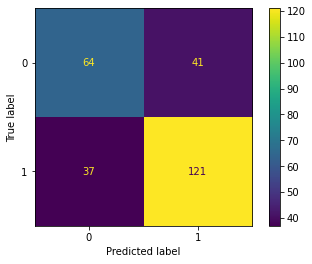

2.Confusion_matrix accuracy : 0.7034220532319392
3.Confusion_matrix precision : 0.7469135802469136
4.Confusion_matrix recall : 0.7658227848101266
5.Confusion_matrix f1_score : 0.7562500000000001
6.Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.61      0.62       105
           1       0.75      0.77      0.76       158

    accuracy                           0.70       263
   macro avg       0.69      0.69      0.69       263
weighted avg       0.70      0.70      0.70       263



In [15]:
print("lOGISTIC REGRESSION MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):")

#accuracy_log=round(metrics.accuracy_score(y_test,y_pred_log),2)
accuracy_log=metrics.accuracy_score(y_test,y_pred_log)
recall_log= metrics.recall_score(y_test,y_pred_log)
Precision_log=metrics.precision_score(y_test,y_pred_log)
f1_score_log=metrics.f1_score(y_test,y_pred_log)
cf_matrix_log = confusion_matrix(y_true = y_test, y_pred = y_pred_log)

print("1.Confusion_Matrix : ","\n",cf_matrix_log)

print("\n")
print("plot_confusion_matrix:")
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()

print("2.Confusion_matrix accuracy :",accuracy_log)
print("3.Confusion_matrix precision :",Precision_log)
print("4.Confusion_matrix recall :",recall_log)
print("5.Confusion_matrix f1_score :",f1_score_log)
print("6.Classification Report :","\n",classification_report(y_test, y_pred_log))

### Model : ADA Boosting

In [16]:

Ada_model=AdaBoostClassifier()
# adaboost model

# RandomSearch CV :Create dict for the ada parameter
random_param = {
    "n_estimators":range(10,100), 
    "algorithm":["SAMME","SAMME.R"], 
    'random_state' : range(100,500),
    'learning_rate':range(1,5)
}

# random cv model
random_search_ada = RandomizedSearchCV(estimator=AdaBoostClassifier(),
                     param_distributions=random_param,random_state=42,
                     cv=5,
                    n_jobs =-1,verbose=2)

print("Parameters: ",random_search_ada.fit(X_train,y_train))

best_parameters_ada = random_search_ada.best_params_
print("\n")
best_parameters_ada = random_search_ada.best_params_
print("The Parameters are :",best_parameters_ada)
print("\n")
print("Mean cross-validated score of the best_estimator:",random_search_ada.best_score_ )

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameters:  RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': range(1, 5),
                                        'n_estimators': range(10, 100),
                                        'random_state': range(100, 500)},
                   random_state=42, verbose=2)


The Parameters are : {'random_state': 167, 'n_estimators': 17, 'learning_rate': 1, 'algorithm': 'SAMME.R'}


Mean cross-validated score of the best_estimator: 0.7280980407965816


In [17]:
Ada_model=AdaBoostClassifier(random_state= 167, n_estimators= 17,learning_rate=1, 
                             algorithm= "SAMME.R")
#Fit the train datapoints in AdaBoostClassifier model

print(Ada_model.fit(X_train,y_train))

# predict the X_test data set and find the predictited value
y_pred_ada= Ada_model.predict(X_test)

print("Training accuracy",accuracy_score(y_train,Ada_model.predict(X_train))*100)
print("Testing accuracy",accuracy_score(y_test,y_pred_ada)*100)

AdaBoostClassifier(learning_rate=1, n_estimators=17, random_state=167)
Training accuracy 77.0012706480305
Testing accuracy 71.48288973384031


In [18]:
a_Test=pd.DataFrame({'Real Values test':y_test, 'Predicted Values test ':y_pred_ada})
a_Test.head()
# Compare the test and predicted output

,Real Values test,Predicted Values test
278,1,0
946,0,0
560,1,0
237,1,1
726,0,0


AdaBoostClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):
1.Confusion_Matrix :  
 [[ 67  38]
 [ 37 121]]


plot_confusion_matrix:


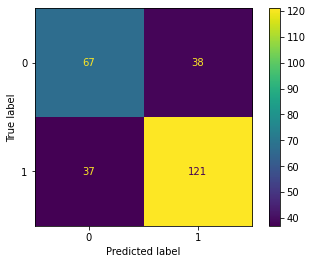

2.Confusion_matrix accuracy : 0.714828897338403
3.Confusion_matrix precision : 0.7610062893081762
4.Confusion_matrix recall : 0.7658227848101266
5.Confusion_matrix f1_score : 0.7634069400630914
6.Classification Report : 
               precision    recall  f1-score   support

           0       0.64      0.64      0.64       105
           1       0.76      0.77      0.76       158

    accuracy                           0.71       263
   macro avg       0.70      0.70      0.70       263
weighted avg       0.71      0.71      0.71       263



In [19]:
print("AdaBoostClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):")

#accuracy_ada=round(metrics.accuracy_score(y_test,y_pred_ada),2)
accuracy_ada=metrics.accuracy_score(y_test,y_pred_ada)
recall_ada= metrics.recall_score(y_test,y_pred_ada)
Precision_ada=metrics.precision_score(y_test,y_pred_ada)
f1_score_ada=metrics.f1_score(y_test,y_pred_ada)
cf_matrix_ada = confusion_matrix(y_true = y_test, y_pred = y_pred_ada)

print("1.Confusion_Matrix : ","\n",cf_matrix_ada)
print("\n")
print("plot_confusion_matrix:")
plot_confusion_matrix(Ada_model, X_test, y_test)  
plt.show()

print("2.Confusion_matrix accuracy :",accuracy_ada)
print("3.Confusion_matrix precision :",Precision_ada)
print("4.Confusion_matrix recall :",recall_ada)
print("5.Confusion_matrix f1_score :",f1_score_ada)
print("6.Classification Report :","\n",classification_report(y_test, y_pred_ada))


# Model: RandomForest Classifier

In [20]:

#Rf_model=RandomForestClassifier()
# RandomForestClassifier model

# RandomSearch CV :Create dict for the ada parameter
random_param_rf = {
    "n_estimators":range(50,500), 
    "criterion":["gini","entropy","log_loss"], 
    'max_depth' : range(10,50),
    'min_samples_split':range(1,5),
    "min_samples_leaf":range(1,5),
    "max_features":["sqrt","log2"]
}

# random cv model
random_search_Rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                     param_distributions=random_param_rf,random_state=42,
                     cv=5,
                    n_jobs =-1,verbose=2)

print("Parameters: ",random_search_Rf.fit(X_train,y_train))

best_parameters_Rf = random_search_Rf.best_params_
print("\n")
best_parameters_Rf = random_search_Rf.best_params_
print("The Parameters are :",best_parameters_Rf)
print("\n")
print("Mean cross-validated score of the best_estimator:",random_search_Rf.best_score_ )

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Parameters:  RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(10, 50),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 5),
                                        'n_estimators': range(50, 500)},
                   random_state=42, verbose=2)


The Parameters are : {'n_estimators': 137, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 19, 'criterion': 'gini'}


Mean cross-validated score of the best_estimator: 0.8487623961944692


In [21]:
Rf_model=RandomForestClassifier(n_estimators= 137, min_samples_split= 2,
                                min_samples_leaf=1, max_features= "log2",
                               max_depth=19,criterion="gini")
#Fit the train datapoints in RandomForestClassifier model

print(Rf_model.fit(X_train,y_train))

# predict the X_test data set and find the predictited value
y_pred_Rf= Rf_model.predict(X_test)

print("Training accuracy",accuracy_score(y_train,Rf_model.predict(X_train))*100)
print("Testing accuracy",accuracy_score(y_test,y_pred_Rf)*100)

RandomForestClassifier(max_depth=19, max_features='log2', n_estimators=137)
Training accuracy 100.0
Testing accuracy 86.31178707224335


In [22]:
a_Test=pd.DataFrame({'Real Values test':y_test, 'Predicted Values test ':y_pred_Rf})
a_Test.head()
# Compare the test and predicted output

,Real Values test,Predicted Values test
278,1,0
946,0,0
560,1,0
237,1,1
726,0,1


RandomForestClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):
1.Confusion_Matrix :  
 [[ 94  11]
 [ 25 133]]


plot_confusion_matrix:


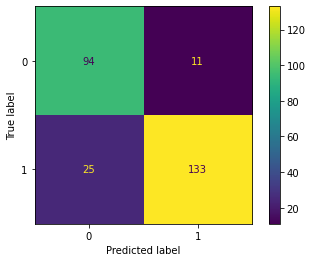

2.Confusion_matrix accuracy : 0.8631178707224335
3.Confusion_matrix precision : 0.9236111111111112
4.Confusion_matrix recall : 0.8417721518987342
5.Confusion_matrix f1_score : 0.8807947019867549
6.Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.92      0.84      0.88       158

    accuracy                           0.86       263
   macro avg       0.86      0.87      0.86       263
weighted avg       0.87      0.86      0.86       263



In [23]:
print("RandomForestClassifier MODEL PERFORMANCE MATRIX(CONFUSION MATRIX):")

#accuracy_rf=round(metrics.accuracy_score(y_test,y_pred_rf),2)
accuracy_rf=metrics.accuracy_score(y_test,y_pred_Rf)
recall_rf= metrics.recall_score(y_test,y_pred_Rf)
Precision_rf=metrics.precision_score(y_test,y_pred_Rf)
f1_score_rf=metrics.f1_score(y_test,y_pred_Rf)
cf_matrix_rf = confusion_matrix(y_true = y_test, y_pred = y_pred_Rf)

print("1.Confusion_Matrix : ","\n",cf_matrix_rf)
print("\n")
print("plot_confusion_matrix:")
plot_confusion_matrix(Rf_model, X_test, y_test)  
plt.show()

print("2.Confusion_matrix accuracy :",accuracy_rf)
print("3.Confusion_matrix precision :",Precision_rf)
print("4.Confusion_matrix recall :",recall_rf)
print("5.Confusion_matrix f1_score :",f1_score_rf)
print("6.Classification Report :","\n",classification_report(y_test, y_pred_Rf))

**Note: When copmpare all the model by using Cross validate score, Random forest gives better accuracy.So using RandomizedSearchCv select the best parameter.Also compare to other models Random forest model perfomance is good.It predict the class correctly more than other models.So as per simplicity and perfomance of this RandomForest model is selected.**

# Save the model.

In [26]:
## import the module:

import pickle
from pathlib import Path
## Set root equal to your current folder:

root = Path("C:/Users/Saransh Sehrawat/My Projects/Internship Credit Risk")

#Create a path to your sub-folder and file name:

my_path = root / "Saved_Model" / "RandomForest_Classifier.pckl"

#Open your file, dump data to your file, close your file:

my_file = open(my_path, 'wb')
my_file = pickle.dump("Rf_model", my_file)
#my_file.close()

In [27]:
# save the model to disk
filepath = r'C:/Users/Saransh Sehrawat/My Projects/Internship Credit Risk/Saved_Model/RandomForest_Classifier_pickle.pckl'
pickle.dump(Rf_model, open(filepath, 'wb'))